## 1. Connexion à la base de données

In [1]:
import pandas as pd
import database
import matplotlib.pyplot as plt
import seaborn as sns

df = database.main()
df.drop_duplicates(keep='first', inplace=True)
print(df.head)

<bound method NDFrame.head of                                                  title  \
0                              Data Analyst internship   
1                              Senior Data Analyst H/F   
2                                         Data Analyst   
3                                         Data analyst   
4                                 Product Data Analyst   
..                                                 ...   
872                                 Data Analyst (H/F)   
873   [INTERNSHIP] Generative AI Intern Data Scientist   
874                              Business Data Analyst   
875  Data Analyst sur les accidents du travail et l...   
876                    Alternance - Data Analyst (F/H)   

                                               company  \
0                                         PGBPGNGLOBAL   
1                                                Qonto   
2                                                 Jump   
3                                        

## 2. Définir les compétences des offres d'emploi

In [2]:
# Load keywords from a CSV file without headers
keywords_df = pd.read_csv('skills.csv', header=None)  # Replace 'keywords.csv' with your file path
keyword_list = keywords_df[0].tolist()

# Function to find keywords in the description
def find_keywords(description, keywords):
    return [keyword for keyword in keywords if keyword in description]

# Apply the function to create the new column
df['skills'] = df['description'].apply(lambda desc: find_keywords(desc, keyword_list))
print(df.head)

<bound method NDFrame.head of                                                  title  \
0                              Data Analyst internship   
1                              Senior Data Analyst H/F   
2                                         Data Analyst   
3                                         Data analyst   
4                                 Product Data Analyst   
..                                                 ...   
872                                 Data Analyst (H/F)   
873   [INTERNSHIP] Generative AI Intern Data Scientist   
874                              Business Data Analyst   
875  Data Analyst sur les accidents du travail et l...   
876                    Alternance - Data Analyst (F/H)   

                                               company  \
0                                         PGBPGNGLOBAL   
1                                                Qonto   
2                                                 Jump   
3                                        

## 3. Compétences les plus demandées

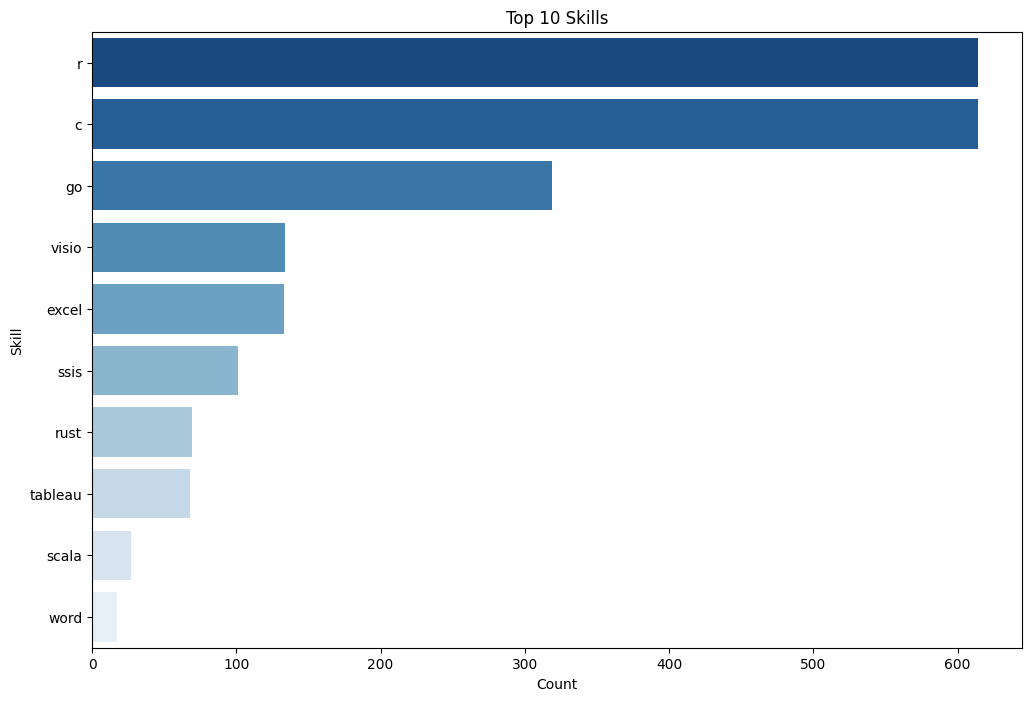

In [3]:
# Bar graph of the top 10 skills
skills = df['skills'].explode().value_counts().nlargest(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=skills.values, y=skills.index, palette="Blues_r")
plt.title('Top 10 Skills')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.show()

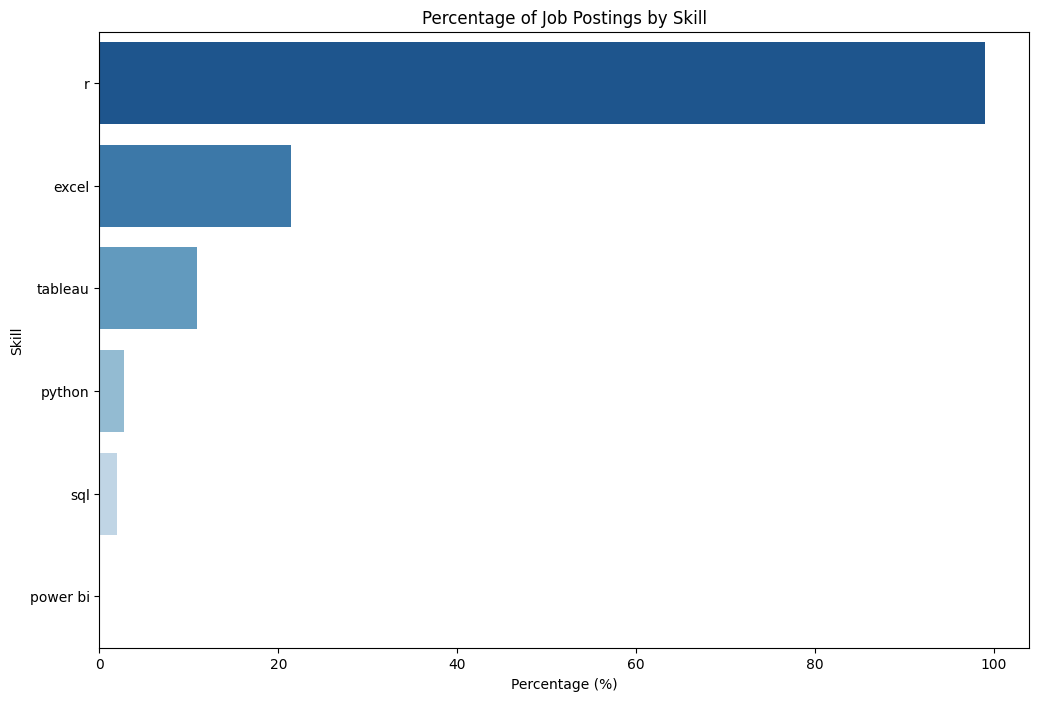

In [4]:
# List of selected skills
selected_skills = ['sql', 'excel', 'python', 'r', 'tableau', 'power bi']

# Count occurrences of each skill
skills_count = {skill: sum(df['skills'].apply(lambda x: skill in x)) for skill in selected_skills}

# Convert counts to percentages
total_postings = len(df)
skills_percentage = {skill: (count / total_postings * 100) for skill, count in skills_count.items()}

# Data for plotting
skills_data = pd.DataFrame(list(skills_percentage.items()), columns=['Skill', 'Percentage']).sort_values(by='Percentage', ascending=False)

# Plotting the percentage of job postings by skill
plt.figure(figsize=(12, 8))
sns.barplot(x='Percentage', y='Skill', data=skills_data, palette="Blues_r")
plt.title('Percentage of Job Postings by Skill')
plt.xlabel('Percentage (%)')
plt.ylabel('Skill')
plt.show()

## 4. Correlation entre les compétences

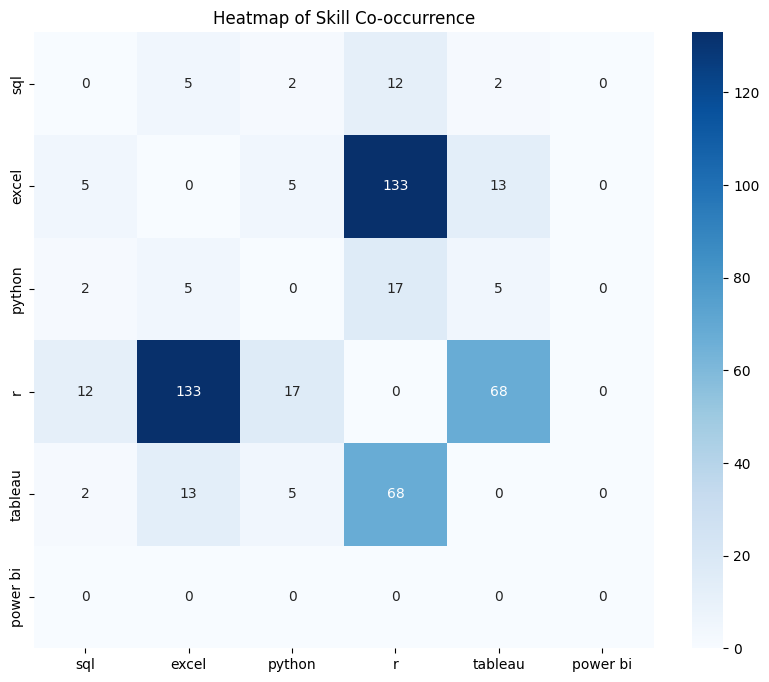

In [5]:
from itertools import combinations
from collections import defaultdict
import networkx as nx

# 1. Heatmap of Skill Co-occurrence
co_occurrence_matrix = pd.DataFrame(0, index=selected_skills, columns=selected_skills)

for skills in df['skills']:
    for skill_pair in combinations(skills, 2):
        if skill_pair[0] in selected_skills and skill_pair[1] in selected_skills:
            co_occurrence_matrix.at[skill_pair[0], skill_pair[1]] += 1
            co_occurrence_matrix.at[skill_pair[1], skill_pair[0]] += 1

plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Heatmap of Skill Co-occurrence")
plt.show()

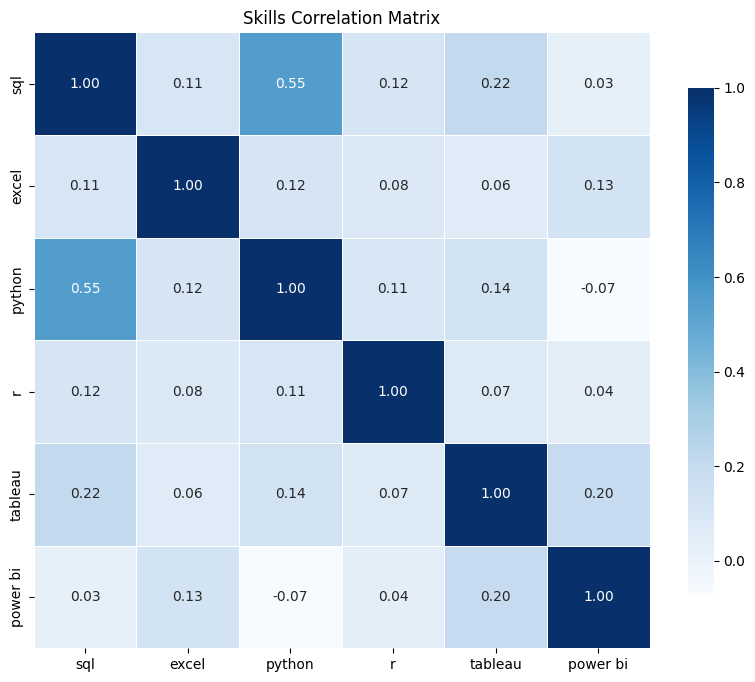

In [6]:
import numpy as np

# Initialize a DataFrame to store the presence (1) or absence (0) of each skill in each job description
skills_matrix = pd.DataFrame(0, index=df.index, columns=selected_skills)

# Populate the matrix with the presence or absence of skills
for skill in selected_skills:
    skills_matrix[skill] = df['description'].apply(lambda x: 1 if skill in x.lower() else 0)

# Calculate the correlation matrix
correlation_matrix = skills_matrix.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Skills Correlation Matrix')
plt.show()
